# データの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# CSV データの読み込み
df = pd.read_csv('housing.csv')

In [3]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


# 分布の確認

In [4]:
 import seaborn as sns

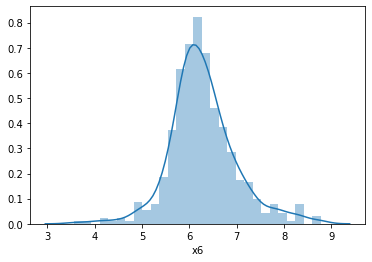

In [5]:
sns.distplot(df['x6'])

# 外れ値除去 ( 3σ 法)

In [7]:
col = 'x6' # 列の値として x6 を使用することを明示

In [8]:
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [11]:
mean[col] # mean['x6'] と同義

6.284634387351788

In [15]:
# 標準偏差 (standard deviation, std)
sigma = df.std()
# sigma
sigma[col]

0.7026171434153234

In [18]:
low = mean[col] -3 * sigma[col] # 閾値の下限
low

4.176782957105817

In [19]:
high = mean[col] + 3 * sigma[col] # 閾値の上限
high

8.392485817597759

In [23]:
df2 = df[(df[col] > low) & (df[col] < high)]  # 閾値の範囲でデータを絞る。
# 比較演算子を利用。また、上限下限 2 つの条件を使う場合 & を使用
df2

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [24]:
len(df)

506

In [25]:
len(df2)

498

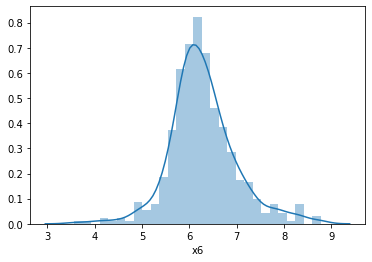

In [26]:
# 分布の確認
sns.distplot(df['x6'])

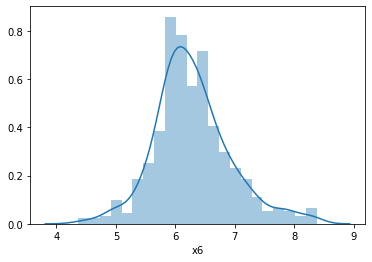

In [27]:
sns.distplot(df2['x6']) # 端に近い外れ値を除去してプロット

In [31]:
cols = df.columns # データフレーム内にどのような列があるか
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [32]:
for col in cols:
    print(col)

x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x12
x13
y


In [38]:
_df = df # df をテンポラリーの _df にコピー
for col in cols:
    # 3σ法の上下限値を設定
    low  = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    # 条件で絞り込み
    _df  = _df[(_df[col] > low) & (_df[col] < high)]

In [39]:
_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [40]:
# オリジナル
len(df)

506

In [41]:
# 3σ 法の適用後
len(_df) # 変数が多ければ、多いほどオリジナルよりも減る。

415

### 対処法

- 外れ値は取り除く
- 外れ値を平均もしくは中央値などで埋める (特にサンプルが減りすぎてしまう場合)
- 主成分分析等を使って、潜在変数に変換した後に 3σ 法を適用 <-- 重要な変数に元変数を変換して利用。高度

# 入力変数と出力変数に分割

In [43]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [47]:
# df.iloc[行, 列]
X = _df.iloc[:, :-1]
y = _df.iloc[:, -1]

In [45]:
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [46]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: y, Length: 415, dtype: float64

# 訓練データと検証データに分割

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# 重回帰分析

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
# モデルの宣言
model = LinearRegression()

In [52]:
# モデルの学習
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# 検証 <-- 訓練データ
model.score(X_train, y_train) # 前回の結果 0.74 を大幅に上回った

0.7972109224535133

In [56]:
# 検証 <-- 検証データ
model.score(X_test, y_test) # 訓練データに対しては精度が低下

0.6253776004329594

In [58]:
# 過学習 (オーバーフィッティング)
# 重回帰分析の場合、このオーバーフィッティングを回避する策に乏しく、データのクレンジングを頑張るしかない
# 他の機械学習の手法の場合は、ハイパーパラメータを調整をして過学習を避ける方法を探る

# スケーリング

In [59]:
from sklearn.preprocessing import StandardScaler # データの標準化を行うための専用ライブラリ

In [60]:
# scaler の宣言
scaler = StandardScaler()

In [62]:
# scaler の学習 <-- 平均と標準偏差を計算
scaler.fit(X_train) # 訓練データのみを基本的には利用

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
# scaling
X_train2 = scaler.transform(X_train)
X_test2  = scaler.transform(X_test) 

In [65]:
X_train2 # +-1 の標準偏差のため、+-3 までの範囲が閾値

array([[-0.44982613, -0.47117023, -0.01455847, ...,  0.3716043 ,
         0.06655172, -0.73371428],
       [-0.45396528, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.38053452, -0.32783019],
       [-0.19959841, -0.47117023,  1.29482264, ..., -1.75496677,
        -0.18177662, -0.75722108],
       ...,
       [ 0.49446336, -0.47117023,  1.07385525, ...,  0.84417564,
         0.27992872, -0.12097034],
       [-0.45659855,  0.61013288, -0.5893723 , ...,  0.08806149,
         0.44754069, -0.88259069],
       [-0.47327932, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.44754069, -0.54095851]])

In [66]:
# モデルの宣言
model = LinearRegression()

In [67]:
# モデルの学習
model.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# 検証 <-- 訓練データ
model.score(X_train2, y_train) # 重回帰分析についてはスケーリングで精度は変わらない

0.7972109224535133

In [69]:
#　検証 <-- 検証データ
model.score(X_test2, y_test)

0.6253776004329598

In [71]:
# 重みの確認
model.coef_

array([-0.19542642,  0.21154333,  0.50827735,  0.        , -1.21336016,
        3.91986658, -0.36986122, -1.85711554,  1.16625182, -1.52855186,
       -1.8725663 ,  0.24442708, -2.76100147])

In [72]:
np.set_printoptions(precision=3, suppress=True)

In [73]:
# 重みの確認
model.coef_ # x6 と x13 が重要そうと言える

array([-0.195,  0.212,  0.508,  0.   , -1.213,  3.92 , -0.37 , -1.857,
        1.166, -1.529, -1.873,  0.244, -2.761])

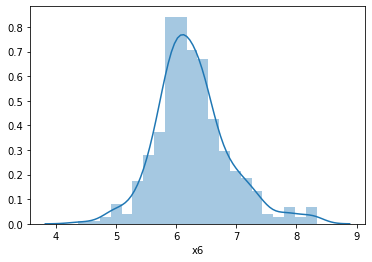

In [74]:
sns.distplot(_df['x6'])

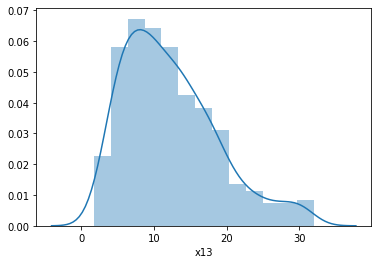

In [75]:
sns.distplot(_df['x13'])

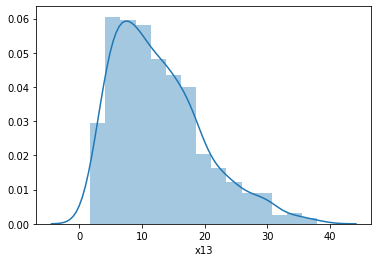

In [77]:
sns.distplot(df['x13']) # 外れ値除去前